Feedback:
- más zoom.
- mejor storytelling.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Hay una gran desigualdad entre las empresas del SP500

In [2]:
companies = pd.read_csv('./data/EDA/companies.csv').convert_dtypes()

In [3]:
# import mcap data
mycols = ['symbol', 'date','year', 'month', 'multiplier',  'real_mcap', 'sma10', 'sma30']
mcaps = pd.read_csv('./data/EDA/mcaps.csv', usecols=mycols).convert_dtypes()
# from 1995 mask
mymask = mcaps.year >= 1995
mcaps = mcaps.loc[mymask, :]
# month name for vizs
mcaps['date'] = pd.to_datetime(mcaps['date'])

inner join mcap and companies symbols so that non existing symbols are not considered

In [4]:
# obtenemos los simbolos de el DataFrame de compañias
joincols = ['symbol']
rightcols = [ 'sector', 'years_active']
mcaps = mcaps.merge(companies.loc[:,joincols+rightcols], how='inner', on = joincols)

#### Fig. Valor/empresa medio diario de todas las compañias del sp500

In [5]:
def getp05(x):
    return x.quantile(0.05)
def getp95(x):
    return x.quantile(0.95)

daily_total = mcaps.groupby(['date','year','month'], as_index=False)
daily_total = daily_total.agg(
    mean_mcap = ('sma30', 'mean'), 
    median_mcap = ('sma30', 'median'),
    std_mcap = ('sma30', 'std'),
    p05 = ('sma30', getp05),
    p95 = ('sma30', getp95))

Melt to plot

In [6]:
plot_data = pd.melt(daily_total, id_vars=['date'], value_vars=['mean_mcap','median_mcap','std_mcap', 'p05', 'p95'], var_name='measure')

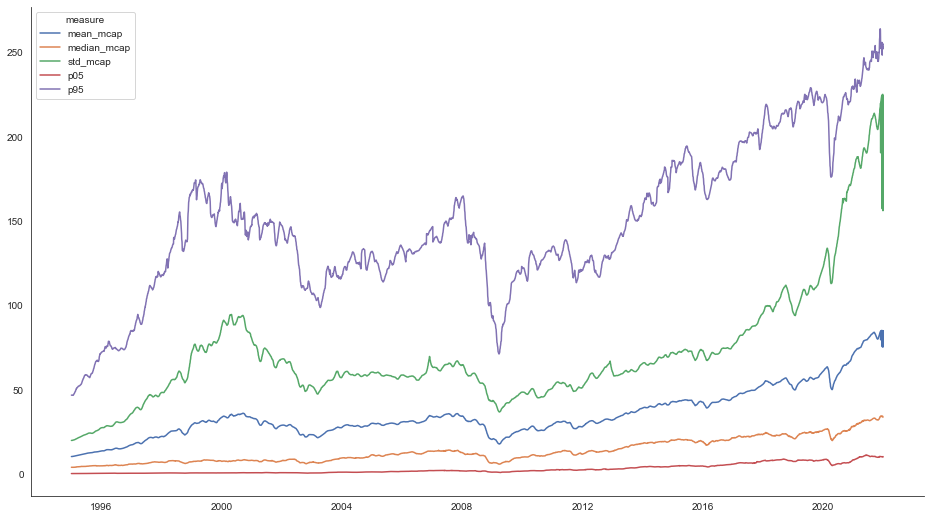

In [7]:
sns.set_style("white")
mypal = sns.color_palette('deep', n_colors=5)
fig, ax = plt.subplots(1,1, figsize=[16,9])
sns.lineplot(data=plot_data, x='date', y='value', hue='measure', palette=mypal)
sns.despine()
# hide axis names
ax.set(xlabel=None)
ax.set(ylabel=None)
# hide labels
plt.savefig('./fig/sp500_distribution.png', bbox_inches='tight')

#### Histograma del valor medio de cada empresa a dic 2021

In [8]:
a = mcaps.year == 2021
b = mcaps.month == 12
c = a & b
dic_2021 = mcaps.loc[c, :]

In [9]:
dic_2021 = dic_2021.groupby('symbol', as_index=False).real_mcap.mean()

In [11]:
# rank them by market cap
dic_2021['rank'] = dic_2021.real_mcap.rank(method = 'dense', ascending=False)
# get pct
dic_2021['pct_total'] = 100 * dic_2021.real_mcap / dic_2021.real_mcap.sum()

In [12]:
dic_2021 = dic_2021.sort_values(by='rank').reset_index(drop=True)

In [13]:
dic_2021.iloc[:20]

,symbol,real_mcap,rank,pct_total
0,AAPL,2867.052589,1.0,6.764332
1,MSFT,2512.036905,2.0,5.926731
2,GOOG,1943.570247,3.0,4.585529
3,AMZN,1741.567804,4.0,4.108938
4,TSLA,1028.52115,5.0,2.426624
5,FB,919.618918,6.0,2.169687
6,NVDA,749.730342,7.0,1.768863
7,BRK-B,640.407674,8.0,1.510935
8,JPM,471.163053,9.0,1.111631
9,UNH,455.883003,10.0,1.07558


In [17]:
joincols = ['symbol']
rightcols = [ 'sector', 'years_active']
dic_2021 = dic_2021.merge(companies.loc[:,joincols+rightcols], how='inner', on = joincols)

In [26]:
dic_2021['cumulative_total'] = dic_2021.pct_total.cumsum()

In [37]:
sector_total = dic_2021.groupby('sector').pct_total.sum().sort_values(ascending=False)

In [92]:
top3 = dic_2021.groupby('sector').head(3).symbol.tolist()

In [102]:
dic_2021['top3'] = False
dic_2021['top3'] = dic_2021.symbol.isin(top3)

In [283]:
companies

,symbol,name,sector,subSector,headQuarter,dateFirstAdded,cik,founded,years_active
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902,120
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888,134
2,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013,9
3,ABMD,Abiomed,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981,41
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,33
...,...,...,...,...,...,...,...,...,...
495,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997,25
496,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969,53
497,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927,95
498,ZION,Zions Bancorp,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873,149


In [284]:
dic_2021

,symbol,real_mcap,rank,pct_total,sector,years_active,cumulative_total,top3,accumulated
0,AAPL,2867.052589,1.0,6.764332,Information Technology,45,6.764332,True,6.764332
1,MSFT,2512.036905,2.0,5.926731,Information Technology,47,12.691063,True,12.691063
2,GOOG,1943.570247,3.0,4.585529,Communication Services,24,17.276592,True,17.276592
3,AMZN,1741.567804,4.0,4.108938,Consumer Discretionary,28,21.385531,True,21.385531
4,TSLA,1028.52115,5.0,2.426624,Consumer Discretionary,19,23.812155,True,23.812155
...,...,...,...,...,...,...,...,...,...
495,HII,7.420009,496.0,0.017506,Industrials,11,99.93556,False,99.93556
496,NLSN,7.364071,497.0,0.017374,Industrials,99,99.952935,False,99.952935
497,PVH,7.158922,498.0,0.01689,Consumer Discretionary,141,99.969825,False,99.969825
498,ALK,6.401863,499.0,0.015104,Industrials,37,99.984929,False,99.984929


In [288]:
dic_2021[dic_2021.top3].sort_values(by=['pct_total', 'sector'], ascending=False)

,symbol,real_mcap,rank,pct_total,sector,years_active,cumulative_total,top3,accumulated
0,AAPL,2867.052589,1.0,6.764332,Information Technology,45,6.764332,True,6.764332
1,MSFT,2512.036905,2.0,5.926731,Information Technology,47,12.691063,True,12.691063
2,GOOG,1943.570247,3.0,4.585529,Communication Services,24,17.276592,True,17.276592
3,AMZN,1741.567804,4.0,4.108938,Consumer Discretionary,28,21.385531,True,21.385531
4,TSLA,1028.52115,5.0,2.426624,Consumer Discretionary,19,23.812155,True,23.812155
5,FB,919.618918,6.0,2.169687,Communication Services,18,25.981842,True,25.981842
6,NVDA,749.730342,7.0,1.768863,Information Technology,29,27.750705,True,27.750705
7,BRK-B,640.407674,8.0,1.510935,Financials,183,29.26164,True,29.26164
8,JPM,471.163053,9.0,1.111631,Financials,22,30.373271,True,30.373271
9,UNH,455.883003,10.0,1.07558,Health Care,45,31.448851,True,31.448851


In [119]:
sector_top3 = dic_2021[dic_2021.top3].groupby('sector').pct_total.sum().sort_values(ascending=False)

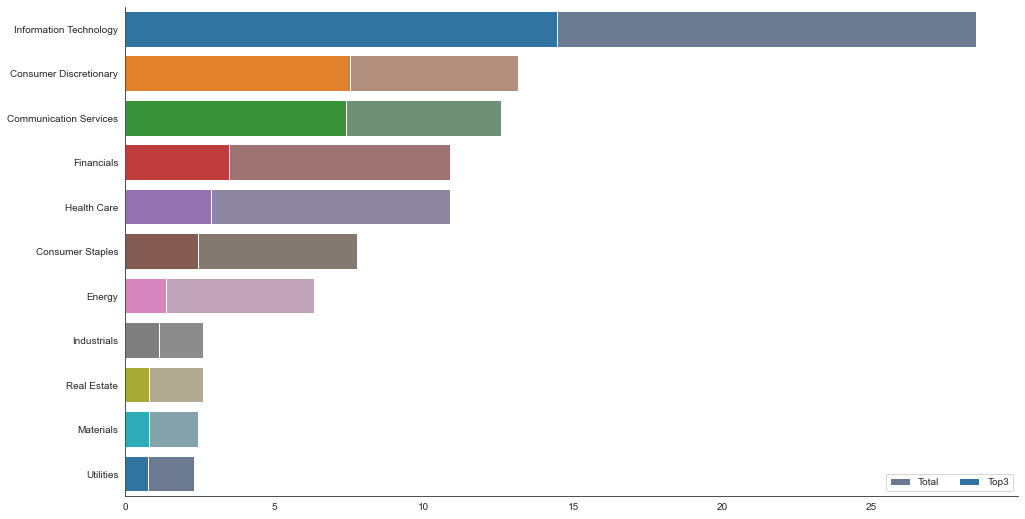

In [257]:
sns.set_style("white")
mypal = sns.color_palette(n_colors=11)
mypal2 = sns.color_palette('deep', n_colors=11, desat=0.5)
fig, ax = plt.subplots(1,1, figsize=[16,9])
sns.barplot(x=sector_total.values, y=sector_total.index, palette=mypal2, ci=False, label='Total')
sns.barplot(x=sector_top3.values, y=sector_top3.index, palette=mypal, ci=False, label='Top3')
sns.despine()
# hide axis names
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.legend(ncol=2, loc="lower right", frameon=True)
# hide labels
plt.savefig('./fig/pct_sector.png', bbox_inches='tight')

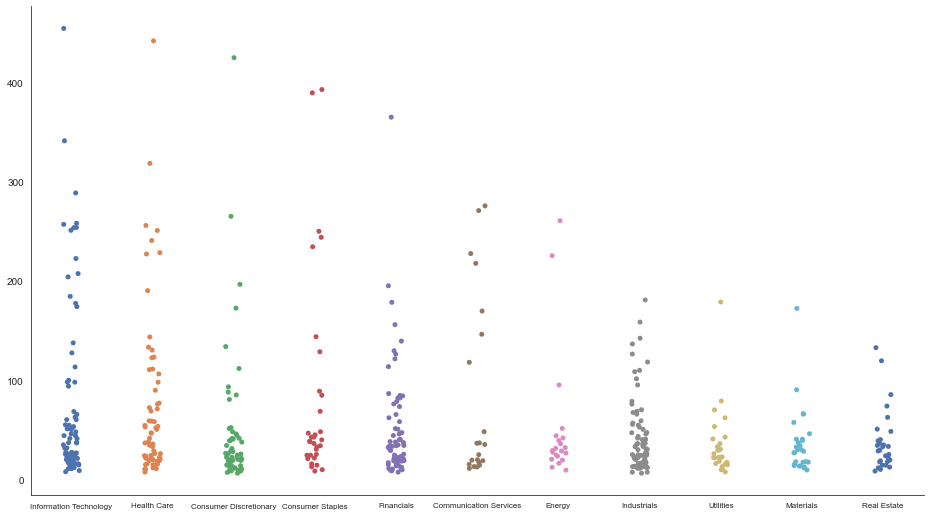

In [81]:
sns.set_style("white")
mypal = sns.color_palette('deep')

fig, ax = plt.subplots(1,1, figsize=[16,9])
sns.stripplot(data=dic_2021.loc[10:], x='sector', y='real_mcap', palette=mypal, ax=ax)
ax.tick_params('x', rotation=0, labelsize=8)
sns.despine()
ax.set(xlabel=None)
ax.set(ylabel=None)

plt.savefig('./fig/sp500_490.png', bbox_inches='tight')

In [82]:
top10 = dic_2021[dic_2021['rank'] < 11].symbol.tolist()

Zoom desde 2015, cuando empieza a haber desigualdad, top10 valores

In [132]:
since_2015_mask = mcaps.year > 2015
since_2015 = mcaps.loc[since_2015_mask, :]

In [133]:
since_2015.loc[:,'year_month'] = since_2015.loc[:,'date'].dt.strftime('%Y%m')
since_2015 = since_2015.groupby(['symbol', 'year_month'], as_index = False).real_mcap.mean().round(2)

C:\Users\fpala\AppData\Local\Temp\ipykernel_11376\2084811688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  since_2015.loc[:,'year_month'] = since_2015.loc[:,'date'].dt.strftime('%Y%m')


In [134]:
top10_since2015 = since_2015[since_2015.symbol.isin(top10)]

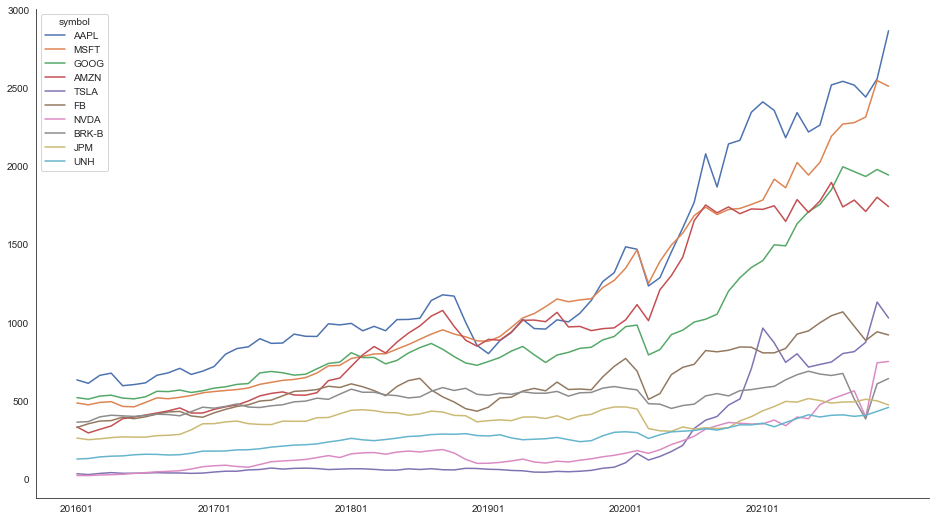

In [135]:
sns.set_style("white")
fig, ax = plt.subplots(1,1, figsize=[16,9])
mypal = sns.color_palette('deep', n_colors=10)
sns.lineplot(data=top10_since2015, x='year_month', y='real_mcap', hue = 'symbol', ax=ax, hue_order=top10, palette=mypal)
sns.despine()
# hide axis names
ax.set(xlabel=None)
ax.set(ylabel=None)
# hide labels
every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.savefig('./fig/sp500_top10.png', bbox_inches='tight')

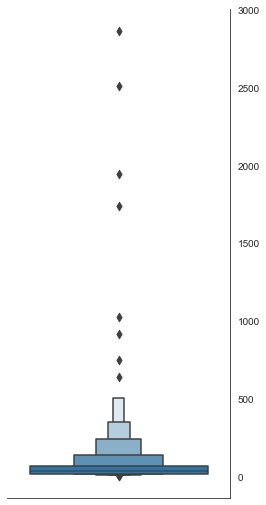

In [136]:
sns.set_style("white")
fig, ax = plt.subplots(1,1, figsize=[4,9])
sns.boxenplot(data = dic_2021, y='real_mcap', ax=ax)
ax.yaxis.tick_right()
sns.despine(top=True, left=True, right=False)
# hide axis names
ax.set(xlabel=None)
ax.set(ylabel=None)

plt.savefig('./fig/boxenplot_dic21.png', bbox_inches='tight')

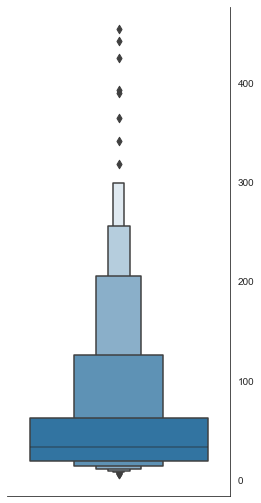

In [137]:
sns.set_style("white")
fig, ax = plt.subplots(1,1, figsize=[4,9])
sns.boxenplot(data = dic_2021.loc[10:], y='real_mcap', ax=ax)
ax.yaxis.tick_right()
sns.despine(top=True, left=True, right=False)
# hide axis names
ax.set(xlabel=None)
ax.set(ylabel=None)

plt.savefig('./fig/boxenplot_dic21_490.png', bbox_inches='tight')

#### Qué las hace diferentes

In [181]:
statements = pd.read_csv('./data/EDA/statements.csv').convert_dtypes()
# keep only dates after 2015
statements = statements.query("calendarYear >= 2015")

Join the statements to the market cap

In [182]:
# get last value of the year
eoy_mcap = mcaps.groupby(['symbol', 'year'], as_index=False).sma10.last()
# inner join
statements = statements.merge(eoy_mcap, left_on=['symbol', 'calendarYear'],right_on=['symbol', 'year'], how= 'inner')
# convert to billions
to_billions =[
    'operatingCashFlow',
    'capitalExpenditure',
    'freeCashFlow',
    'revenue',
    'costOfRevenue',
    'researchAndDevelopmentExpenses',
    'generalAndAdministrativeExpenses',
    'sellingAndMarketingExpenses',
    'sellingGeneralAndAdministrativeExpenses',
    'otherExpenses',
    'interestIncome',
    'interestExpense',
    'cashAndCashEquivalents',
    'shortTermInvestments',
    'cashAndShortTermInvestments',
    'netReceivables',
    'otherCurrentAssets',
    'totalAssets',
    'accountPayables',
    'shortTermDebt',
    'totalCurrentLiabilities',
    'longTermDebt',
    'totalNonCurrentLiabilities',
    'totalLiabilities',
    'retainedEarnings',
    'totalEquity',
    'totalLiabilitiesAndTotalEquity',
    'totalInvestments',
    'totalDebt',
    'netDebt',
]
statements.loc[:,to_billions] = statements.loc[:,to_billions]/1e9

TODO: Ajustar inflacion

In [183]:
to_drop = [
    'date',
    'fillingDate',
    'multiplier_x',
    'year_x',
    'year_y',
    ]
to_analyze = statements.drop(columns = to_drop)

Add sector info

In [184]:
companies = pd.read_csv('./data/EDA/companies.csv').convert_dtypes()
to_analyze = to_analyze.merge(companies.loc[:,['symbol', 'sector']], on=['symbol']).convert_dtypes()

In [185]:
to_analyze.head(3)

,symbol,calendarYear,operatingCashFlow,capitalExpenditure,freeCashFlow,revenue,costOfRevenue,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,...,retainedEarnings,totalEquity,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,month,multiplier_y,sma10,sector
0,MMM,2021,7.454,-1.603,5.851,35.355,18.795,0.468392,1.994,7.197,...,45.821,15.117,47.072,0.0,17.626,13.062,12,1.005171,101.709764,Industrials
1,MMM,2020,8.113,-1.501,6.612,32.184,16.605,0.48406,1.878,6.879,...,43.761,12.931,47.344,0.618,19.753,15.119,12,1.054405,107.432984,Industrials
2,MMM,2019,7.07,-1.699,5.371,32.136,17.136,0.466766,1.911,7.029,...,42.135,10.126,44.659,0.294,20.56,18.207,12,1.070012,108.970234,Industrials


In [186]:
to_analyze.corr()['sma10'].sort_values(ascending=False).head(20)

sma10                                      1.000000
operatingCashFlow                          0.741484
researchAndDevelopmentExpenses             0.689938
freeCashFlow                               0.647489
revenue                                    0.566811
sellingAndMarketingExpenses                0.532160
sellingGeneralAndAdministrativeExpenses    0.464957
totalNonCurrentLiabilities                 0.438534
retainedEarnings                           0.407322
totalEquity                                0.402776
costOfRevenue                              0.396341
longTermDebt                               0.386379
totalDebt                                  0.382124
netReceivables                             0.377433
totalAssets                                0.292858
totalLiabilitiesAndTotalEquity             0.292858
netDebt                                    0.277797
interestExpense                            0.266771
accountPayables                            0.260691
shortTermDeb

In [188]:
data2021 = to_analyze.query("calendarYear == 2021")

In [220]:
to_analyze.sma10 = to_analyze.sma10.astype(float)
to_analyze.revenue = to_analyze.revenue.astype(float)
to_analyze.freeCashFlow = to_analyze.freeCashFlow.astype(float)
to_analyze.researchAndDevelopmentExpenses = to_analyze.researchAndDevelopmentExpenses.astype(float)
to_analyze.totalEquity = to_analyze.totalEquity.astype(float)


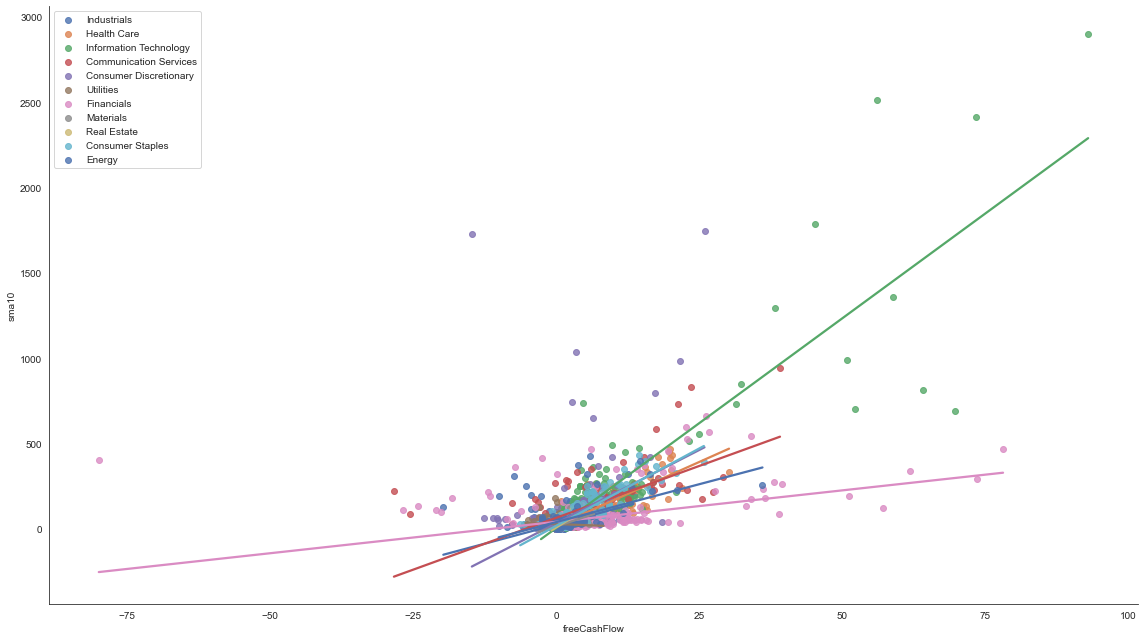

In [216]:
sns.set_style("white")
# fig, ax = plt.subplots(1,1, figsize=[16,9])
mypal = sns.color_palette('deep', n_colors = 11)
sns.lmplot(data = to_analyze, y = 'sma10', x='freeCashFlow', hue = 'sector', palette=mypal, height=9, aspect =16/9, ci=None, legend=False)
sns.despine()
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.legend(loc='upper left')
plt.savefig('./fig/freeCashFlow2marketCap.png', bbox_inches='tight')

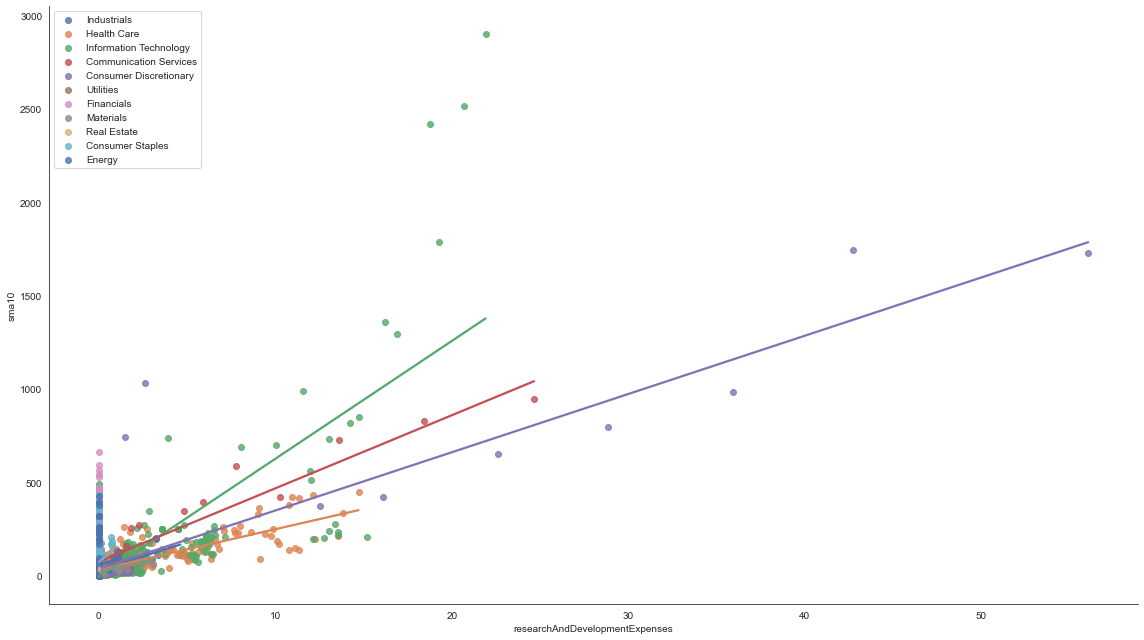

In [219]:
sns.set_style("white")
# fig, ax = plt.subplots(1,1, figsize=[16,9])
mypal = sns.color_palette('deep', n_colors = 11)
sns.lmplot(data = to_analyze, y = 'sma10', x='researchAndDevelopmentExpenses', hue = 'sector', palette=mypal, height=9, aspect =16/9, ci=None, legend=False)
sns.despine()
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.legend(loc='upper left')

plt.savefig('./fig/researchAndDevelopmentExpenses.png', bbox_inches='tight')

C:\Users\fpala\2022\TheBridge\venv_thebridge\lib\site-packages\seaborn\regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\fpala\2022\TheBridge\venv_thebridge\lib\site-packages\seaborn\regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


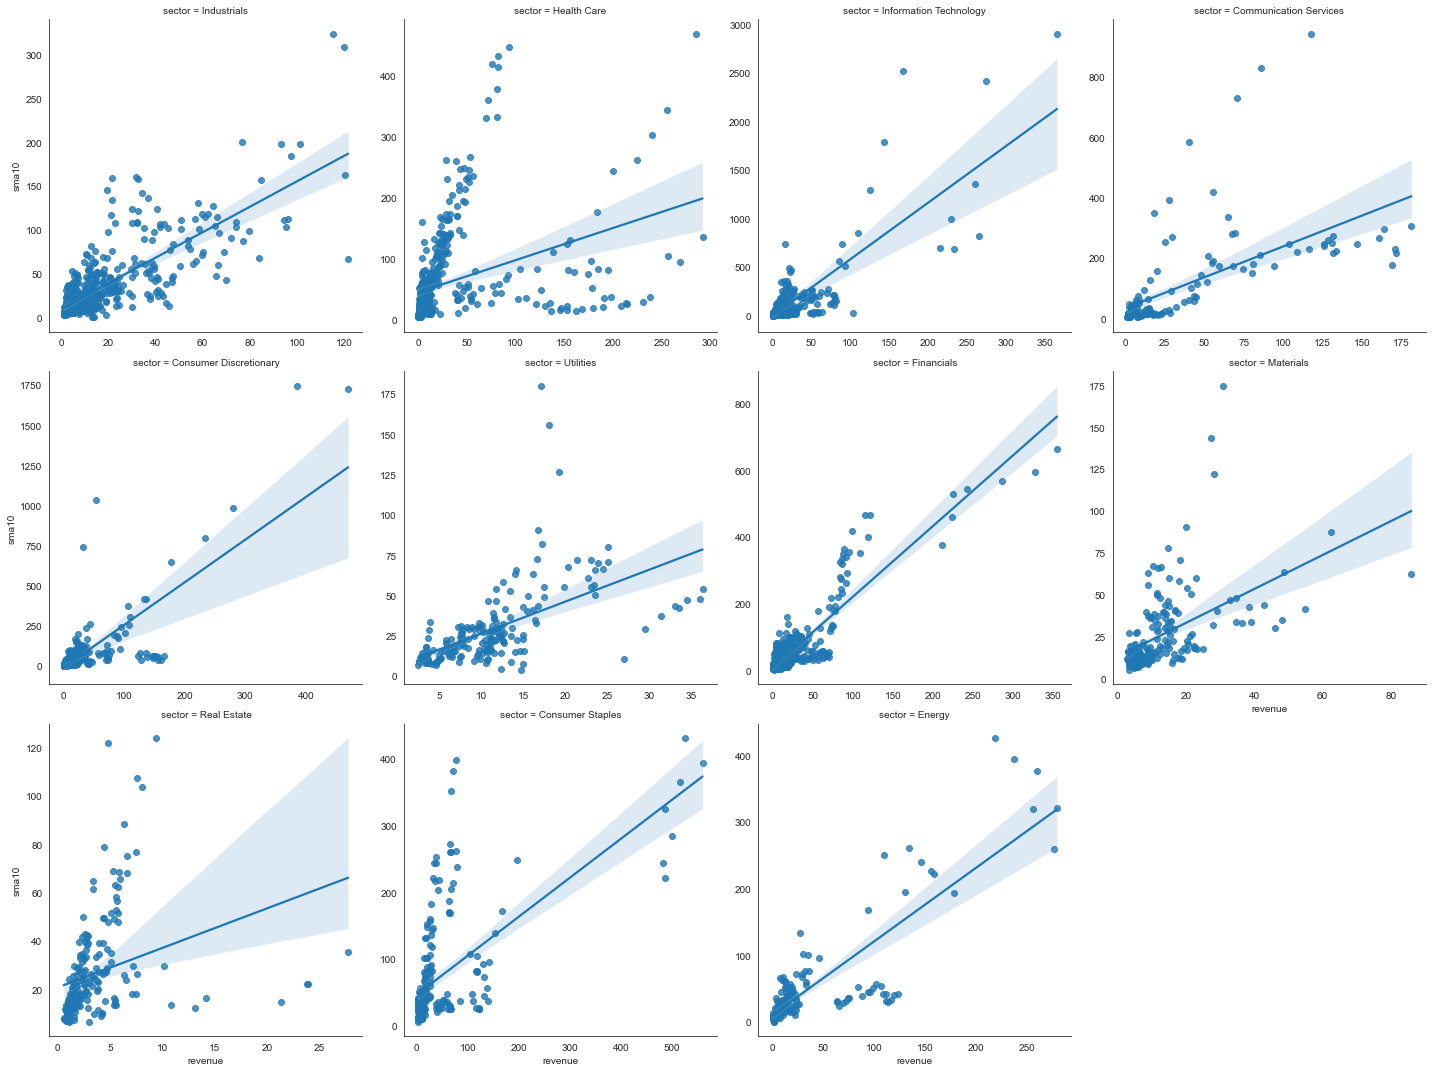

In [206]:
sns.set_style("white")
mypal = sns.color_palette('deep', n_colors = 11)
sns.lmplot(data = to_analyze, y = 'sma10', x='revenue', col='sector', col_wrap = 4, sharex=False, sharey=False)
sns.despine()
ax.set(xlabel=None)
ax.set(ylabel=None)

plt.savefig('./fig/revenue.png', bbox_inches='tight')

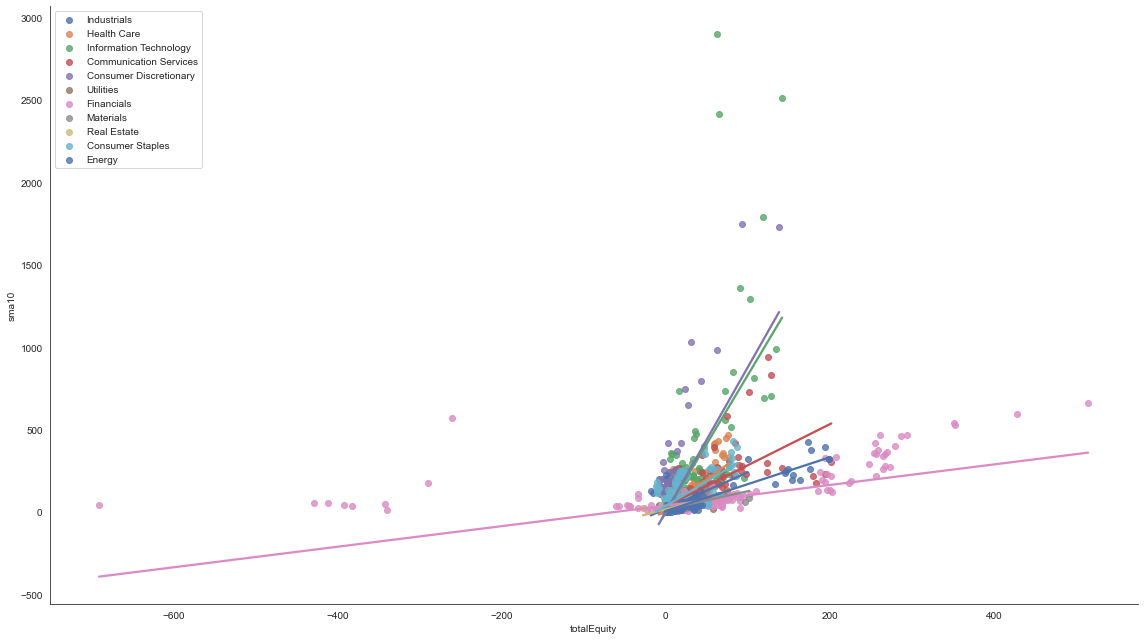

In [222]:
sns.set_style("white")
# fig, ax = plt.subplots(1,1, figsize=[16,9])
mypal = sns.color_palette('deep', n_colors = 11)
sns.lmplot(data = to_analyze, y = 'sma10', x='totalEquity', hue = 'sector', palette=mypal, height=9, aspect =16/9, ci=None, legend=False)
sns.despine()
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.legend(loc='upper left')

plt.savefig('./fig/equity.png', bbox_inches='tight')

Get cap growth

In [224]:
to_analyze['yoy_increase'] = to_analyze.groupby('symbol').sma10.pct_change(-1)
to_analyze['yo2y_increase'] = to_analyze.groupby('symbol').sma10.pct_change(-2)

Largest growers yo2y

In [228]:
cond1 = to_analyze.calendarYear == 2021
cond2 = to_analyze.yo2y_increase > 1 
cond3 = to_analyze.sma10 > 50
mask = (cond1 & cond2) & cond3
growth_2y = to_analyze[mask]

In [230]:
growth_2y.shape

(23, 44)

In [240]:
plot_data = growth_2y.sort_values('yo2y_increase', ascending=False)
plot_data['yo2y_increase_%'] = plot_data['yo2y_increase']*100
plot_data['yoy_increase_%'] = plot_data['yoy_increase']*100

In [244]:
plot_data = plot_data.set_index('symbol')

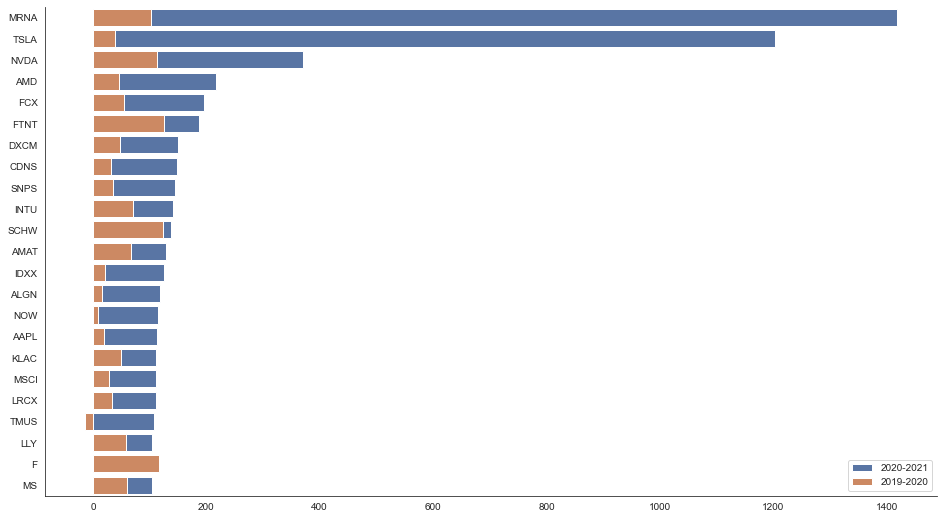

In [261]:
sns.set_style("white")
mypal = sns.color_palette('deep', n_colors=11)
mypal2 = sns.color_palette(n_colors=11)
fig, ax = plt.subplots(1,1, figsize=[16,9])
sns.barplot(y=plot_data.index, x=plot_data['yo2y_increase_%'], ci=False, color = mypal[0], label='2020-2021')
sns.barplot(y=plot_data.index, x=plot_data['yoy_increase_%'], ci=False, color = mypal[1], label='2019-2020')
sns.despine()
# hide axis names
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.legend(ncol=1, loc="lower right", frameon=True)
# hide labels
plt.savefig('./fig/growth_yo2y_50Bn.png', bbox_inches='tight')

In [278]:
plot_data.reset_index().merge(companies, on='symbol', how='inner')[['symbol', 'name', 'sector_y']]

,symbol,name,sector_y
0,MRNA,Moderna,Health Care
1,TSLA,Tesla,Consumer Discretionary
2,NVDA,Nvidia,Information Technology
3,AMD,Advanced Micro Devices,Information Technology
4,FCX,Freeport-McMoRan,Materials
5,FTNT,Fortinet,Information Technology
6,DXCM,DexCom,Health Care
7,CDNS,Cadence Design Systems,Information Technology
8,SNPS,Synopsys,Information Technology
9,INTU,Intuit,Information Technology
